# Calculating Weighting Functions

In this example we calculate weighting functions for ozone using SASKTRAN-Disco. Refer to SASKTRAN-Disco's documentation page for more documentation.

In [1]:
%matplotlib inline

import numpy as np
import sasktran as sk
import sasktran.disco.interface as do
import matplotlib.pyplot as plt

In [2]:
# Setup the sk.Geometry
geometry = sk.NadirGeometry()

tempo = sk.Geodetic()
tempo.from_lat_lon_alt(0, -100, 35786000)

geometry.from_lat_lon(lats=52.131638, lons=-106.633873, elevations=0,
    mjd=57906.843, observer=tempo
)

# Setup the sk.Atmosphere
atmosphere = sk.Atmosphere()
atmosphere['rayleigh'] = sk.Species(sk.Rayleigh(), sk.MSIS90())
atmosphere['o3'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['no2'] = sk.Species(sk.NO2OSIRISRes(), sk.Pratmo())
atmosphere.atmospheric_state = sk.MSIS90()
atmosphere.brdf = sk.Kokhanovsky()

# Construct the engine
engine = do.EngineDO(geometry=geometry, atmosphere=atmosphere, wavelengths=[330])

In [3]:
# Configure the weighting function calculation
atmosphere.wf_species = 'o3'

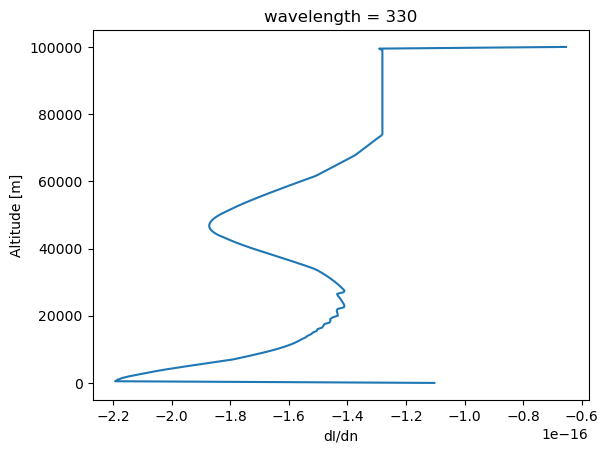

In [4]:
rad = engine.calculate_radiance()

# Plot weighting function
plt.figure()
rad['wf_o3'].isel(wavelength=0).plot(y='altitude')
plt.ylabel('Altitude [m]')
plt.xlabel('dI/dn')
plt.show()